# Modeling exercise

## General Instructions

* Submission date: 14.5.2023
* Submission Method: Link to your solution notebook in [this sheet](https://docs.google.com/spreadsheets/d/1GNPESGIhJpPb7LwMAyjF5qpJfZQak_mLkE3i5Y7a_VA/edit?usp=sharing).

In [1]:
import sys; sys.path.append('../src')
import numpy as np
import plotly_express as px

In [2]:
import pandas as pd
import ipywidgets as widgets

In [3]:
from datasets import make_circles_dataframe, make_moons_dataframe

## Fitting and Overfiting 

The goal of the following exercise is to:
* Observe overfitting due to insuffient data
* Observe Overfitting due to overly complex model
* Identify the overfitting point by looking at Train vs Test error dynamic
* Observe how noise levels effect the needed data samples and model capacity

To do so, you'll code an experiment in the first part, and analyze the experiment result in the second part.

### Building an experiment

Code:

1. Create data of size N with noise level of magnitude NL from datasets DS_NAME. 
1. Split it to training and validation data (no need for test set), use 80%-20%. 
1. Use Logistic regression and Choose one complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
1. Train on the train set for different hyper parameter values. compute:
   1. Classification accuracy on the training set (TRE)
   1. Classification accuracy on the validation set (TESTE)
   1. The difference beteen the two above (E_DIFF)
1. Save DS_NAME, N, NL, CLF_NAME, K, TRE, TESTE, E_DIFF and the regularization/hyper param (K, gamma or min_samples_split and regularization value for the linear regression classifier)

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### Analysing the expermient results

1. For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it? 
1. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.
1. Does regularization help for linear models? consider different datasets sizes. 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)
1. Are the noise level effect the number of datapoints needed to reach optimal test results? 

Bonus:

* For SVM: Select one dataset and with 0.2 noise level. Identify the optimal model params, and visualize the decision boundry learned. 
  * Hint: Use a grid. See classification models notebook 

## Tips and Hints

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

**If you get stuck, and need refernce, scroll to the end of the notebook to see more hints!**

## Moons dataset

In [4]:
from sklearn.datasets import make_moons

In [5]:
noise_level_value = 0.1

In [6]:
moons_df = make_moons_dataframe(n_samples=1000, noise_level=noise_level_value)
moons_df.head()

,x,y,label
0,0.930622,-0.437097,B
1,-1.005158,0.000406,A
2,0.475302,-0.518920,B
3,-0.055452,-0.031129,B
4,1.498966,-0.399406,B


In [7]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    moons_df = make_moons_dataframe(n_samples=1000, noise_level=noise_level)
    return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Circles Dataset

In [8]:
circles_df = make_circles_dataframe(n_samples=500, noise_level=noise_level_value)
circles_df.head()

,x,y,label
0,1.074084,-0.043234,A
1,-0.578796,0.215835,B
2,0.838865,0.340225,B
3,0.345465,-0.729450,B
4,-0.726039,-0.406658,B


In [9]:
noise_level_value

0.1

In [10]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Appendix

### More hints!

If you'll build the datasets dataframe correctly, you'll have **one** dataframe that has dataset_name and noise_level colmuns, as well as the regular x,y,label colmns. To unsure you've appended everything correctly, groupby the proper colmuns and look at the size:

In [11]:
# Use proper groupby statement to ensure the datasets dataframe contains data as expected. You should see the following result:

Your 

You experiment code should look something like that:

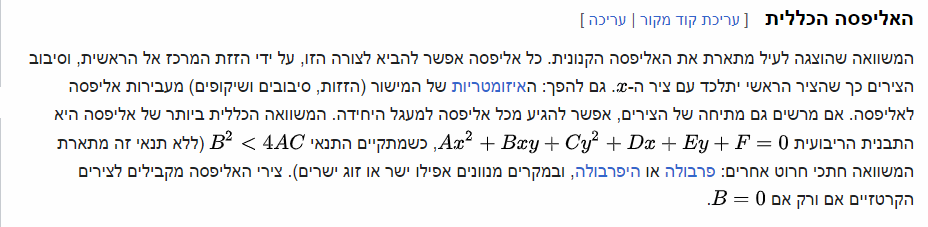

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict


In [14]:
results = pd.DataFrame(columns=['DS_NAME', 'N', 'NL', 'CLF_NAME', 'K','RegVal', 'TRE', 'TESTE', 'E_DIFF'])
datasets_type = ['circles', 'moons']
#datasets_type = ['circles']
k_folds = [10]
n_samples = [50, 100, 1000, 10000]
# n_samples = [10000]

# noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg', 'svm']
# hp_range = {'log_reg':{}, 'svm':{}, 'rand_forest':{}}
# regularization_values = [0.001]
regularization_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
noise_levels = [0.2]

# clf_types = ['log_reg']
# hp_range = {'log_reg':{}, 'svm':{'gamma':[], }, 'rand_forest':{}}

gamma_range = [0.01, 0.1, 1, 10, 100]
# gamma_range = [100]


# pre proceeing of data
moons_df['type']='moons'
circles_df['type']='circles'

In [15]:
df=pd.concat([circles_df, moons_df])
df['x^2']=df['x']**2
df['y^2']=df['y']**2
df['x*y']=df['x']*df['y']

In [16]:
df_original = df

In [17]:
# Q3 imports classifiers
for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            print('n: ',n)
            df = df_original[df_original["type"] == ds_type].head(n)
            # print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for k in k_folds:
                X = df.drop(['label', 'type'], axis=1)
                y = df['label']
                X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                for clf_type in clf_types:
                    if clf_type == 'log_reg':
                        for regularization_value in regularization_values:
                            clf = LogisticRegression(random_state=0, C=regularization_value, solver='liblinear')
                            clf.fit(X_train, y_train)
                            y_pred = clf.predict(X_test)
                            y_train_pred = cross_val_predict(clf, X_train, y_train, cv=k)
                            train_acc = accuracy_score(y_train, y_train_pred)
                            test_acc = accuracy_score(y_test, y_pred)
                            df2 = pd.DataFrame({'DS_NAME':ds_type,'N':n,'NL':nl, 
                                                'CLF_NAME':clf_type,'K':k,'RegVal':regularization_value, 
                                                'Gamma':'none',
                                                'TRE':train_acc, 'TESTE': test_acc, 'E_DIFF': train_acc-test_acc}, index=[0])
                            results = results.append(df2)
                            

                    elif clf_type == 'svm':
                        for regularization_value in regularization_values:
                            hp_range = [0.01, 0.1, 1, 10, 100]
                            # hp_range = [0.01]
                            for gamma in hp_range:
                                clf = SVC(kernel='rbf', C=regularization_value, gamma=gamma)
                                # cross_val_score(clf, X_train, y_train, cv=10)
                                clf.fit(X_train, y_train)
                                
                                y_pred = clf.predict(X_test)
                                y_train_pred = cross_val_predict(clf, X_train, y_train, cv=k)
                                # cross_val_score(clf, X_train, y_train, cv=10).mean()
                                
                                train_acc = accuracy_score(y_train, y_train_pred)
                                test_acc = accuracy_score(y_test, y_pred)
                                
                                df2 = pd.DataFrame({'DS_NAME':ds_type,'N':n,'NL':nl, 
                                'CLF_NAME':clf_type,'K':k,'RegVal':regularization_value, 
                                'Gamma':gamma,
                                'TRE':train_acc, 'TESTE': test_acc, 'E_DIFF': train_acc-test_acc}, index=[0])
                                # print('DS_NAME', ds_type,'N', n,'NL',nl, 
                                # 'CLF_NAME',clf_type,'K',k,'RegVal',regularization_value, 
                                # 'Gamma', gamma,
                                # 'TRE', train_acc, 'TESTE', test_acc, 'E_DIFF', train_acc-test_acc)
                                results = results.append(df2)
                    
                    elif clf_type == 'rf':
                        for regularization_value in regularization_values:
                            hp_range = [0.01, 0.1, 1, 10, 100]
                            # for gamma in hp_range:
                            clf = RandomForestClassifier(max_depth=2, random_state=0)
                            clf.fit(X_train, y_train)
                            y_pred = clf.predict(X_test)
                            y_train_pred = cross_val_predict(clf, X_train, y_train, cv=k)
                            train_acc = accuracy_score(y_train, y_train_pred)
                            test_acc = accuracy_score(y_test, y_pred)
                            df2 = pd.DataFrame({'DS_NAME':ds_type,'N':n,'NL':nl, 
                            'CLF_NAME':clf_type,'K':k,'RegVal':regularization_value, 
                            'Gamma':gamma,
                            'TRE':train_acc, 'TESTE': test_acc, 'E_DIFF': train_acc-test_acc}, index=[0])
                            results = results.append(df2)

Working on circles
n:  50
n:  100
n:  1000
n:  10000
Working on moons
n:  50
n:  100
n:  1000
n:  10000


In [18]:
#clf.coef_

In [19]:
# df_svm_10k = results[(results['CLF_NAME']=='svm') & (results['N']==10000)]

In [20]:
# df_svm_10k

In [21]:
# df_svm_10k_circle = df_svm_10k[(df_svm_10k['DS_NAME']=='circles') & (df_svm_10k['N']==10000)] #remove noise level
# df_svm_10k_circle.reset_index(drop=True, inplace=True)

In [22]:
# df_svm_10k_circle.NL.unique()

In [23]:
#Max TRE
# df_svm_10k_circle.loc[df_svm_10k_circle.TRE.idxmax()]

In [24]:
#Max TESTE
# df_svm_10k_circle.loc[df_svm_10k_circle.TESTE.idxmax()]

In [25]:
# df_svm_10k_circle['E_DIFF']=abs(df_svm_10k_circle['E_DIFF'])
# df_svm_10k_circle.loc[df_svm_10k_circle.E_DIFF.idxmin()]

In [26]:
#results.sort_values(by='RegVal')

In [27]:
results.reset_index(inplace=True)

In [28]:
results.loc[results.TRE.idxmax()]

index           0
DS_NAME     moons
N              50
NL            0.2
CLF_NAME      svm
K              10
RegVal       10.0
TRE           1.0
TESTE         1.0
E_DIFF        0.0
Gamma           1
Name: 197, dtype: object

In [29]:
results.loc[results.TESTE.idxmax()]

index             0
DS_NAME     circles
N                50
NL              0.2
CLF_NAME        svm
K                10
RegVal         10.0
TRE             0.8
TESTE           1.0
E_DIFF         -0.2
Gamma           0.1
Name: 28, dtype: object

In [30]:
results['E_DIFF']=abs(results['E_DIFF'])
results.loc[results.E_DIFF.idxmin()]

index             0
DS_NAME     circles
N                50
NL              0.2
CLF_NAME    log_reg
K                10
RegVal        0.001
TRE             0.6
TESTE           0.6
E_DIFF          0.0
Gamma          none
Name: 0, dtype: object

In [31]:
# import plotly_express as px

# fig = px.bar(results.reset_index(), x='E_DIFF', y='RegVal', color = 'N',facet_col='E_DIFF')#.show()
# fig
# # fig.update_traces(marker=dict(size=15, line=dict(width=10, color='DarkSlateGrey')), selector=dict(mode='markers'))

In [32]:
# px.bar(results.reset_index(), x='E_DIFF', y=['TRE','TESTE'], color = 'NL',facet_col='K').show()

#### Q1: For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it?


In [33]:
# Q1 set-up
results = pd.DataFrame(columns=['DS_NAME', 'N', 'NL', 'CLF_NAME', 'K','RegVal', 'TRE', 'TESTE', 'E_DIFF'])
datasets_type = ['circles', 'moons']
#datasets_type = ['circles']
k_folds = [10]
#n_samples = [50, 100, 1000, 10000]
n_samples = [10000]
# noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['svm']
#clf_types = ['log_reg', 'svm']
# hp_range = {'log_reg':{}, 'svm':{}, 'rand_forest':{}}
# regularization_values = [0.001]
regularization_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
noise_levels = [0.2]

# clf_types = ['log_reg']
# hp_range = {'log_reg':{}, 'svm':{'gamma':[], }, 'rand_forest':{}}

gamma_range = [0.01, 0.1, 1, 10, 100]
# gamma_range = [100]

# pre proceeing of data
moons_df['type']='moons'
circles_df['type']='circles'

df=pd.concat([circles_df, moons_df])
df['x^2']=df['x']**2
df['y^2']=df['y']**2
df['x*y']=df['x']*df['y']

df_original = df

In [34]:
# Q1 code
for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            print('n: ',n)
            df = df_original[df_original["type"] == ds_type].head(n)
            # print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for k in k_folds:
                X = df.drop(['label', 'type'], axis=1)
                y = df['label']
                X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                for clf_type in clf_types:
                    if clf_type == 'log_reg':
                        for regularization_value in regularization_values:
                            clf = LogisticRegression(random_state=0, C=regularization_value, solver='liblinear')
                            clf.fit(X_train, y_train)
                            y_pred = clf.predict(X_test)
                            y_train_pred = cross_val_predict(clf, X_train, y_train, cv=k)
                            train_acc = accuracy_score(y_train, y_train_pred)
                            test_acc = accuracy_score(y_test, y_pred)
                            df2 = pd.DataFrame({'DS_NAME':ds_type,'N':n,'NL':nl, 
                                                'CLF_NAME':clf_type,'K':k,'RegVal':regularization_value, 
                                                'Gamma':'none',
                                                'TRE':train_acc, 'TESTE': test_acc, 'E_DIFF': train_acc-test_acc}, index=[0])
                            results = results.append(df2)
                            

                    elif clf_type == 'svm':
                        for regularization_value in regularization_values:
                            hp_range = [0.01, 0.1, 1, 10, 100]
                            # hp_range = [0.01]
                            for gamma in hp_range:
                                clf = SVC(kernel='rbf', C=regularization_value, gamma=gamma)
                                # cross_val_score(clf, X_train, y_train, cv=10)
                                clf.fit(X_train, y_train)
                                
                                y_pred = clf.predict(X_test)
                                y_train_pred = cross_val_predict(clf, X_train, y_train, cv=k)
                                # cross_val_score(clf, X_train, y_train, cv=10).mean()
                                
                                train_acc = accuracy_score(y_train, y_train_pred)
                                test_acc = accuracy_score(y_test, y_pred)
                                
                                df2 = pd.DataFrame({'DS_NAME':ds_type,'N':n,'NL':nl, 
                                'CLF_NAME':clf_type,'K':k,'RegVal':regularization_value, 
                                'Gamma':gamma,
                                'TRE':train_acc, 'TESTE': test_acc, 'E_DIFF': train_acc-test_acc}, index=[0])
                                # print('DS_NAME', ds_type,'N', n,'NL',nl, 
                                # 'CLF_NAME',clf_type,'K',k,'RegVal',regularization_value, 
                                # 'Gamma', gamma,
                                # 'TRE', train_acc, 'TESTE', test_acc, 'E_DIFF', train_acc-test_acc)
                                results = results.append(df2)

Working on circles
n:  10000
Working on moons
n:  10000


In [35]:
results

,DS_NAME,N,NL,CLF_NAME,K,RegVal,TRE,TESTE,E_DIFF,Gamma
0,circles,10000,0.2,svm,10,0.001,0.51750,0.430,0.08750,0.01
0,circles,10000,0.2,svm,10,0.001,0.51750,0.430,0.08750,0.10
0,circles,10000,0.2,svm,10,0.001,0.51750,0.430,0.08750,1.00
0,circles,10000,0.2,svm,10,0.001,0.51750,0.430,0.08750,10.00
0,circles,10000,0.2,svm,10,0.001,0.51750,0.430,0.08750,100.00
...,...,...,...,...,...,...,...,...,...,...
0,moons,10000,0.2,svm,10,1000.000,0.99625,1.000,-0.00375,0.01
0,moons,10000,0.2,svm,10,1000.000,0.99250,0.995,-0.00250,0.10
0,moons,10000,0.2,svm,10,1000.000,0.99625,0.990,0.00625,1.00
0,moons,10000,0.2,svm,10,1000.000,0.99750,1.000,-0.00250,10.00


In [36]:
grid_1=results[['Gamma','RegVal', 'TESTE','E_DIFF','DS_NAME']]
circles_best_param=grid_1.query('DS_NAME=="circles"').sort_values("TESTE",ascending=False)

print("circles_best_params are: ")
print(circles_best_param.head(1),"\n")

moons_best_param=grid_1.query('DS_NAME=="moons"').sort_values("TESTE",ascending=False)

print("moons_best_params are: ")
print(moons_best_param.head(1),"\n")

circles_best_params are: 
   Gamma  RegVal  TESTE  E_DIFF  DS_NAME
0   0.01  1000.0    0.9   -0.06  circles 

moons_best_params are: 
   Gamma  RegVal  TESTE   E_DIFF DS_NAME
0    1.0     1.0    1.0 -0.00375   moons 



#### Q2: For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.
    

In [37]:
grid_2=results[['Gamma','RegVal', 'TESTE','E_DIFF','DS_NAME','N']]
grid_2=grid_2[grid_2['N']==10000]
grid_2
circles_most_stable_model_param=grid_2.query('DS_NAME=="circles"').sort_values('E_DIFF',ascending=True)

print("Stable model is on that the differnce of accuracy between test and train is minimal i.e lowest varianc.\n\n","circles most stable model param are: ")
print(circles_most_stable_model_param.head(1),"\n")

moons_most_stable_model_param=grid_2.query('DS_NAME=="moons"').sort_values('E_DIFF',ascending=True)

print("moons_most stable model param are: ")
print(moons_most_stable_model_param.head(1),"\n")

Stable model is on that the differnce of accuracy between test and train is minimal i.e lowest varianc.

 circles most stable model param are: 
   Gamma  RegVal  TESTE  E_DIFF  DS_NAME      N
0    1.0  1000.0   0.89   -0.08  circles  10000 

moons_most stable model param are: 
   Gamma  RegVal  TESTE   E_DIFF DS_NAME      N
0   0.01     0.1  0.815 -0.02875   moons  10000 



#### Q3: Does regularization help for linear models? consider different datasets sizes.

In [38]:
# Q3 set-up
results = pd.DataFrame(columns=['DS_NAME', 'N', 'NL', 'CLF_NAME', 'K','RegVal', 'TRE', 'TESTE', 'E_DIFF'])
datasets_type = ['circles']
#datasets_type = ['circles']
k_folds = [10]
n_samples = [50, 100, 1000, 10000]
#n_samples = [10000]
noise_levels = [0.2]
# noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg']
#clf_types = ['log_reg', 'svm']
# hp_range = {'log_reg':{}, 'svm':{}, 'rand_forest':{}}
# regularization_values = [0.001]
regularization_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# clf_types = ['log_reg']
# hp_range = {'log_reg':{}, 'svm':{'gamma':[], }, 'rand_forest':{}}

#gamma_range = [0.01, 0.1, 1, 10, 100]
gamma_range = [100]

# pre proceeing of data
moons_df['type']='moons'
circles_df['type']='circles'

df=pd.concat([circles_df, moons_df])
df['x^2']=df['x']**2
df['y^2']=df['y']**2
df['x*y']=df['x']*df['y']

df_original = df

In [39]:
# Q1 code
for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            print('n: ',n)
            df = df_original[df_original["type"] == ds_type].head(n)
            # print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for k in k_folds:
                X = df.drop(['label', 'type'], axis=1)
                y = df['label']
                X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=30)
                for clf_type in clf_types:
                    if clf_type == 'log_reg':
                        for regularization_value in regularization_values:
                            clf = LogisticRegression(random_state=0, C=regularization_value, solver='liblinear')
                            clf.fit(X_train, y_train)
                            y_pred = clf.predict(X_test)
                            y_train_pred = cross_val_predict(clf, X_train, y_train, cv=k)
                            train_acc = accuracy_score(y_train, y_train_pred)
                            test_acc = accuracy_score(y_test, y_pred)
                            df2 = pd.DataFrame({'DS_NAME':ds_type,'N':n,'NL':nl, 
                                                'CLF_NAME':clf_type,'K':k,'RegVal':regularization_value, 
                                                'Gamma':'none',
                                                'TRE':train_acc, 'TESTE': test_acc, 'E_DIFF': train_acc-test_acc}, index=[0])
                            results = results.append(df2)
                            

                    elif clf_type == 'svm':
                        for regularization_value in regularization_values:
                            hp_range = [0.01, 0.1, 1, 10, 100]
                            # hp_range = [0.01]
                            for gamma in hp_range:
                                clf = SVC(kernel='rbf', C=regularization_value, gamma=gamma)
                                # cross_val_score(clf, X_train, y_train, cv=10)
                                clf.fit(X_train, y_train)
                                
                                y_pred = clf.predict(X_test)
                                y_train_pred = cross_val_predict(clf, X_train, y_train, cv=k)
                                # cross_val_score(clf, X_train, y_train, cv=10).mean()
                                
                                train_acc = accuracy_score(y_train, y_train_pred)
                                test_acc = accuracy_score(y_test, y_pred)
                                
                                df2 = pd.DataFrame({'DS_NAME':ds_type,'N':n,'NL':nl, 
                                'CLF_NAME':clf_type,'K':k,'RegVal':regularization_value, 
                                'Gamma':gamma,
                                'TRE':train_acc, 'TESTE': test_acc, 'E_DIFF': train_acc-test_acc}, index=[0])
                                # print('DS_NAME', ds_type,'N', n,'NL',nl, 
                                # 'CLF_NAME',clf_type,'K',k,'RegVal',regularization_value, 
                                # 'Gamma', gamma,
                                # 'TRE', train_acc, 'TESTE', test_acc, 'E_DIFF', train_acc-test_acc)
                                results1 = results.append(df2)

Working on circles
n:  50
n:  100
n:  1000
n:  10000


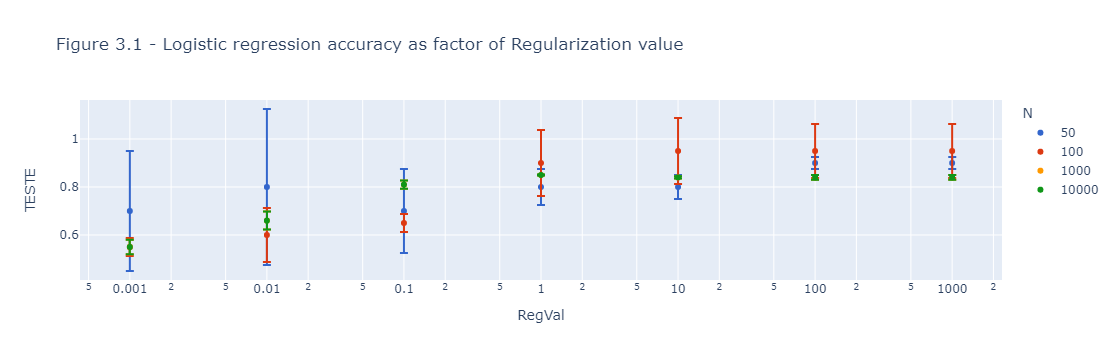

In [40]:
results['LOG_RegVal']=np.log10(results['RegVal'])
results
px.scatter(results.reset_index(), x='RegVal',y='TESTE',error_y='E_DIFF', color_discrete_sequence=px.colors.qualitative.G10 ,log_x=True, color='N', title='Figure 3.1 - Logistic regression accuracy as factor of Regularization value')

3. the regularation helps the model the achive better results. while increasing the number of records we recived better results (less variance from the test accuracy), but it become aymptotic in 1000 samples, i.e. adding more points dosn't increase accuracy.
If there is enough sample we can have lowwr regularization values.
see graph 3.1

In [41]:
# results.sort_values(by='N')

In [42]:
# px.bar(results.reset_index(), x='E_DIFF', y=['TRE','TESTE'], color = 'NL',facet_col='K').show()

In [43]:
# datasets_type = ['circles', 'moons']
# k_folds = 10
# n_samples = [10, 50, 100, 1000, 10000]
# noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
# clf_types = ['log_reg', 'svm']
# hp_range = <'Your hyper parameters ranges here'>
# regularization_values = <'Your regularization values here'>
# results = []
# for ds_type in datasets_type:
#     print(f'Working on {ds_type}')
#     for nl in noise_levels:
#         for n in n_samples:
#             ds = datasets.query(<'your query here'>).head(n)
#             print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
#             for k in range(k_folds):
#                 X, Y = <'Your code here'>
#                 x_train,x_test,y_train,y_test= <'Your code here'>
#                 for clf_type in clf_types:
#                     if clf_type == 'log_reg':
#                         for regularization_value in regularization_values:
#                             train_acc, test_acc = <'Your code here'>
#                             results.append(<'Your code here'>)
#                     if clf_type == 'svm':
#                         for gamma in hp_range:
#                             train_acc, test_acc = <'Your code here'>
#                             results.append(<'Your code here'>)

#### Q4: For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)

In [44]:
# Q4 set-up
results4 = pd.DataFrame(columns=['DS_NAME', 'N', 'NL', 'CLF_NAME', 'K','RegVal', 'TRE', 'TESTE', 'E_DIFF'])
results_moons = pd.DataFrame(columns=['DS_NAME', 'N', 'NL', 'CLF_NAME', 'K','RegVal', 'TRE', 'TESTE', 'E_DIFF'])
datasets_type = ['circles', 'moons']
#datasets_type = ['circles']
k_folds = [10]
n_samples = [50, 100, 1000, 10000]
noise_levels = [0.3]
clf_types = [ 'svm','log_reg']
# hp_range = {'log_reg':{}, 'svm':{}, 'rand_forest':{}}
regularization_values = [0.1]
gamma_range = [1]

moons_df['type']='moons'
circles_df['type']='circles'

df=pd.concat([circles_df, moons_df])
df['x^2']=df['x']**2
df['y^2']=df['y']**2
df['x*y']=df['x']*df['y']

df_original = df

In [45]:
# Q4 code
for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            print('n: ',n)
            df = df_original[df_original["type"] == ds_type].tail(n)
            #print(df)
            # print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for k in k_folds:
                X = df.drop(['label', 'type'], axis=1)
                y = df['label']
                X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                for clf_type in clf_types:
                    if clf_type == 'log_reg':
                        for regularization_value in regularization_values:
                            clf = LogisticRegression(random_state=0, C=regularization_value, solver='liblinear')
                            clf.fit(X_train, y_train)
                            y_pred = clf.predict(X_test)
                            y_train_pred = cross_val_predict(clf, X_train, y_train, cv=k)
                            train_acc = accuracy_score(y_train, y_train_pred)
                            test_acc = accuracy_score(y_test, y_pred)
                            df2 = pd.DataFrame({'DS_NAME':ds_type,'N':n,'NL':nl, 
                                                'CLF_NAME':clf_type,'K':k,'RegVal':regularization_value, 
                                                'Gamma':'none',
                                                'TRE':train_acc, 'TESTE': test_acc, 'E_DIFF': train_acc-test_acc}, index=[0])
                            results4 = results4.append(df2)
                            

                    elif clf_type == 'svm':
                        for regularization_value in regularization_values:
                            hp_range = [1]
                            # hp_range = [0.01]
                            for gamma in hp_range:
                                clf = SVC(kernel='rbf', C=regularization_value, gamma=gamma)
                                # cross_val_score(clf, X_train, y_train, cv=10)
                                clf.fit(X_train, y_train)
                                
                                y_pred = clf.predict(X_test)
                                y_train_pred = cross_val_predict(clf, X_train, y_train, cv=k)
                                # cross_val_score(clf, X_train, y_train, cv=10).mean()
                                
                                train_acc = accuracy_score(y_train, y_train_pred)
                                test_acc = accuracy_score(y_test, y_pred)
                               # print("y_test : ",y_test, "y_pred : ", y_pred)
                                
                                df2 = pd.DataFrame({'DS_NAME':ds_type,'N':n,'NL':nl, 
                                'CLF_NAME':clf_type,'K':k,'RegVal':regularization_value, 
                                'Gamma':gamma,
                                'TRE':train_acc, 'TESTE': test_acc, 'E_DIFF': train_acc-test_acc}, index=[0])
                                # print('DS_NAME', ds_type,'N', n,'NL',nl, 
                                # 'CLF_NAME',clf_type,'K',k,'RegVal',regularization_value, 
                                # 'Gamma', gamma,
                                # 'TRE', train_acc, 'TESTE', test_acc, 'E_DIFF', train_acc-test_acc)
                                results4 = results4.append(df2)

Working on circles
n:  50
n:  100
n:  1000
n:  10000
Working on moons
n:  50
n:  100
n:  1000
n:  10000


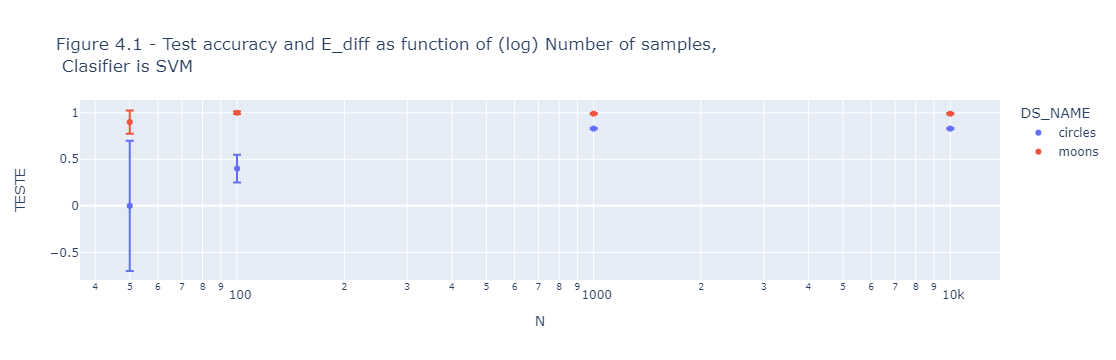

In [46]:
results_Q4a= results4[results4['CLF_NAME']=='svm']
#df[(df['TotalMarks'] > 50) & (df['TotalMarks'] < 80) ]
#results_Q4a['LOG_N']=np.log10(results_Q4a['N'].astype(float))

px.scatter(results_Q4a.reset_index(), x='N',y='TESTE',error_y='E_DIFF', color='DS_NAME',log_x=True,
           title='Figure 4.1 - Test accuracy and E_diff as function of (log) Number of samples, <br> Clasifier is SVM')

In [47]:
df

,x,y,label,type,x^2,y^2,x*y
0,0.930622,-0.437097,B,moons,0.866058,1.910536e-01,-0.406772
1,-1.005158,0.000406,A,moons,1.010343,1.645405e-07,-0.000408
2,0.475302,-0.518920,B,moons,0.225912,2.692780e-01,-0.246644
3,-0.055452,-0.031129,B,moons,0.003075,9.690140e-04,0.001726
4,1.498966,-0.399406,B,moons,2.246899,1.595251e-01,-0.598696
...,...,...,...,...,...,...,...
995,1.559172,-0.266744,B,moons,2.431016,7.115228e-02,-0.415899
996,0.855012,0.523089,A,moons,0.731046,2.736217e-01,0.447247
997,0.122338,1.040947,A,moons,0.014967,1.083570e+00,0.127347
998,1.853086,-0.075974,B,moons,3.433928,5.772011e-03,-0.140786


In [48]:
results_Q4a


,DS_NAME,N,NL,CLF_NAME,K,RegVal,TRE,TESTE,E_DIFF,Gamma
0,circles,50,0.3,svm,10,0.1,0.70000,0.00,0.70000,1.0
0,circles,100,0.3,svm,10,0.1,0.55000,0.40,0.15000,1
0,circles,1000,0.3,svm,10,0.1,0.83750,0.83,0.00750,1
0,circles,10000,0.3,svm,10,0.1,0.83750,0.83,0.00750,1
0,moons,50,0.3,svm,10,0.1,0.77500,0.90,-0.12500,1
0,moons,100,0.3,svm,10,0.1,0.98750,1.00,-0.01250,1
0,moons,1000,0.3,svm,10,0.1,0.99625,0.99,0.00625,1
0,moons,10000,0.3,svm,10,0.1,0.99625,0.99,0.00625,1


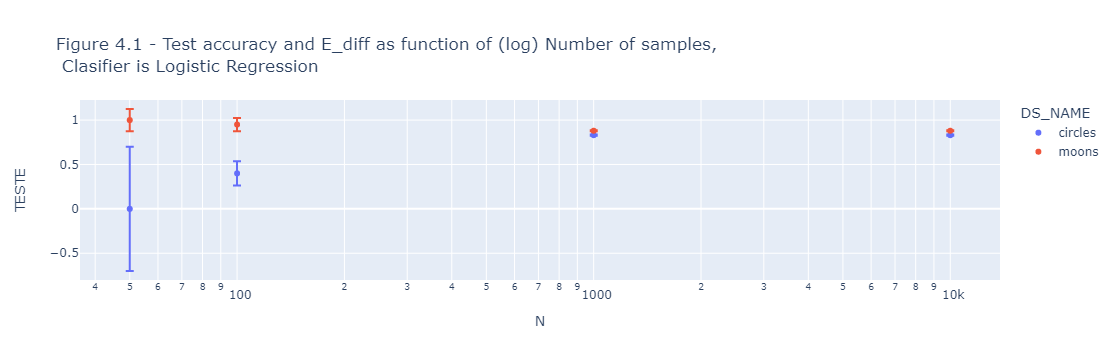

In [49]:
results_Q4a2= results4[results4['CLF_NAME']=='log_reg']

px.scatter(results_Q4a2.reset_index(), x='N',y='TESTE',error_y='E_DIFF', color='DS_NAME',log_x=True,
           title='Figure 4.1 - Test accuracy and E_diff as function of (log) Number of samples, <br> Clasifier is Logistic Regression')

In [50]:
results_Q4a2


,DS_NAME,N,NL,CLF_NAME,K,RegVal,TRE,TESTE,E_DIFF,Gamma
0,circles,50,0.3,log_reg,10,0.1,0.7000,0.00,0.7000,none
0,circles,100,0.3,log_reg,10,0.1,0.5375,0.40,0.1375,none
0,circles,1000,0.3,log_reg,10,0.1,0.8225,0.83,-0.0075,none
0,circles,10000,0.3,log_reg,10,0.1,0.8225,0.83,-0.0075,none
0,moons,50,0.3,log_reg,10,0.1,0.8750,1.00,-0.1250,none
0,moons,100,0.3,log_reg,10,0.1,0.8750,0.95,-0.0750,none
0,moons,1000,0.3,log_reg,10,0.1,0.8750,0.88,-0.0050,none
0,moons,10000,0.3,log_reg,10,0.1,0.8750,0.88,-0.0050,none


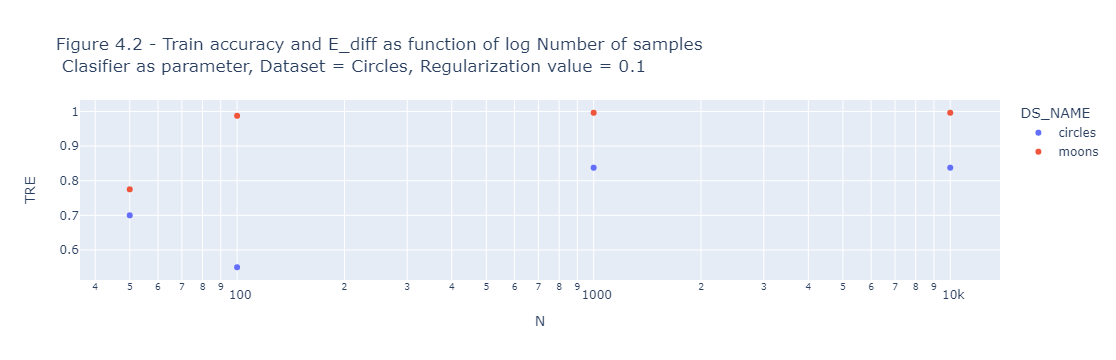

In [51]:
px.scatter(results_Q4a.reset_index(), x='N',y='TRE', color='DS_NAME',log_x=True,
           title="Figure 4.2 - Train accuracy and E_diff as function of log Number of samples<br> Clasifier as parameter, Dataset = Circles, Regularization value = 0.1")

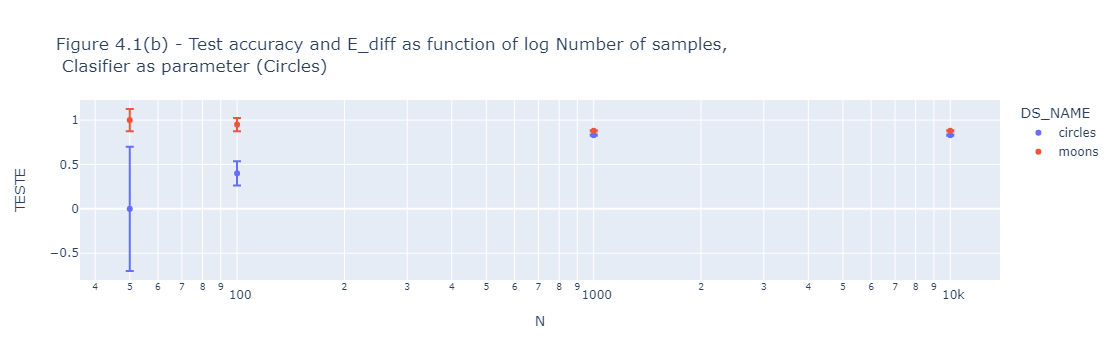

In [52]:
results_Q4b= results4[results4['CLF_NAME']=='log_reg']
px.scatter(results_Q4b.reset_index(), x='N',y='TESTE',error_y='E_DIFF', color='DS_NAME',log_x=True,
           title='Figure 4.1(b) - Test accuracy and E_diff as function of log Number of samples, <br> Clasifier as parameter (Circles)')





## Q5: Noise level does affect the number of datapionts needed to reach optimal accuracy.
As noise level increases, number of datapiont should increase as well in order to reach optimal test results/


In [53]:
results5 = pd.DataFrame(columns=['DS_NAME', 'N', 'NL', 'CLF_NAME', 'K','RegVal', 'TRE', 'TESTE', 'E_DIFF'])
datasets_type = ['circles', 'moons']
k_folds = [10]
n_samples = [10000]
noise_levels = [0.2]

clf_types = ['log_reg', 'svm']
regularization_values = [1]

moons_df['type']='moons'
circles_df['type']='circles'

df=pd.concat([circles_df, moons_df])
df['x^2']=df['x']**2
df['y^2']=df['y']**2
df['x*y']=df['x']*df['y']
df_original = df

In [54]:
feature_list_full = ['x','y','x^2','y^2','x*y']
feature_list_particial = ['label','type']
for feature in feature_list_full:
    feature_list_particial.append(feature)
    num_features= len(feature_list_particial)-2
    for ds_type in datasets_type:
        print(f'Working on {ds_type}')
        for nl in noise_levels:
            for n in n_samples:
                print('n: ',n)
                df = df_original[df_original["type"] == ds_type].head(n)
                df = df[feature_list_particial]
                # print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
                for k in k_folds:
                    X = df.drop(['label', 'type'], axis=1)
                    y = df['label']
                    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=30)
                    for clf_type in clf_types:
                        if clf_type == 'log_reg':
                            for regularization_value in regularization_values:
                                clf = LogisticRegression(random_state=0, C=regularization_value, solver='liblinear')
                                clf.fit(X_train, y_train)
                                y_pred = clf.predict(X_test)
                                y_train_pred = cross_val_predict(clf, X_train, y_train, cv=k)
                                train_acc = accuracy_score(y_train, y_train_pred)
                                test_acc = accuracy_score(y_test, y_pred)
                                df2 = pd.DataFrame({'DS_NAME':ds_type,'N':n,'NL':nl, 
                                                    'CLF_NAME':clf_type,'K':k,'RegVal':regularization_value, 
                                                    'Gamma':'none',
                                                    'TRE':train_acc, 'TESTE': test_acc, 'E_DIFF': train_acc-test_acc, 
                                                    'FEATURES' : str(feature_list_particial),
                                                   'NUMBER_FEATURES':num_features}, index=[0])
                                results5 = results5.append(df2)


                        elif clf_type == 'svm':
                            for regularization_value in regularization_values:
                                # hp_range = [0.01, 0.1, 1, 10, 100]
                                hp_range = [1]
                                for gamma in hp_range:
                                    clf = SVC(kernel='rbf', C=regularization_value, gamma=gamma)
                                    clf.fit(X_train, y_train)

                                    y_pred = clf.predict(X_test)
                                    y_train_pred = cross_val_predict(clf, X_train, y_train, cv=k)

                                    train_acc = accuracy_score(y_train, y_train_pred)
                                    test_acc = accuracy_score(y_test, y_pred)

                                    df2 = pd.DataFrame({'DS_NAME':ds_type,'N':n,'NL':nl, 
                                    'CLF_NAME':clf_type,'K':k,'RegVal':regularization_value, 
                                    'Gamma':gamma,
                                    'TRE':train_acc, 'TESTE': test_acc, 'E_DIFF': train_acc-test_acc,'FEATURES' : str(feature_list_particial),'NUMBER_FEATURES':num_features}, index=[0])
                                    results5 = results5.append(df2)

Working on circles
n:  10000
Working on moons
n:  10000
Working on circles
n:  10000
Working on moons
n:  10000
Working on circles
n:  10000
Working on moons
n:  10000
Working on circles
n:  10000
Working on moons
n:  10000
Working on circles
n:  10000
Working on moons
n:  10000


In [63]:
# results5

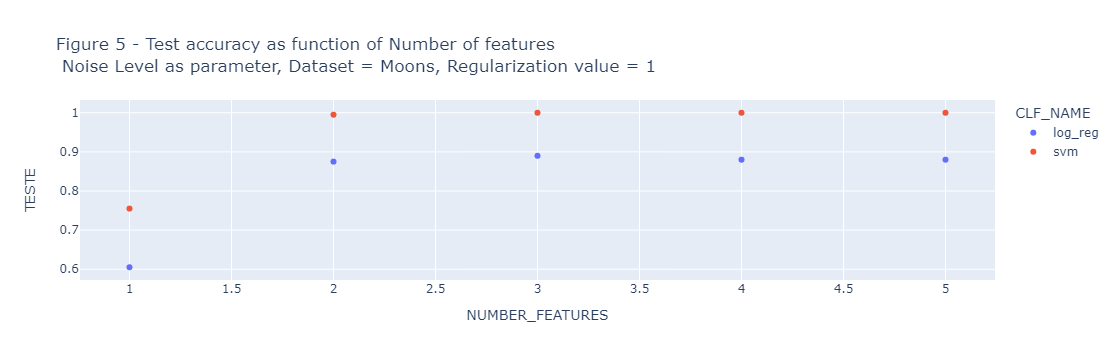

In [56]:
results5_moons = results5[results5['DS_NAME']=='moons']
px.scatter(results5_moons.reset_index(), x='NUMBER_FEATURES',y='TESTE', color='CLF_NAME',log_x=False,
           title="Figure 5 - Test accuracy as function of Number of features<br> Noise Level as parameter, Dataset = Moons, Regularization value = 1")

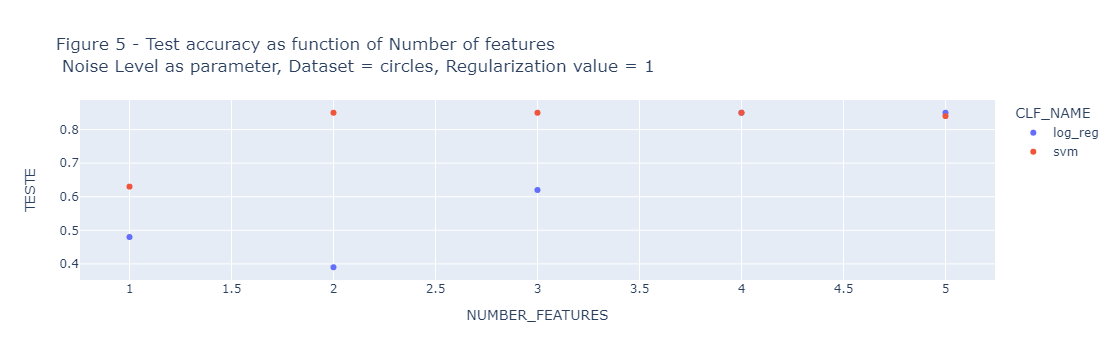

In [57]:
results5_circle = results5[results5['DS_NAME']=='circles']
px.scatter(results5_circle.reset_index(), x='NUMBER_FEATURES',y='TESTE', color='CLF_NAME',log_x=False,
           title="Figure 5 - Test accuracy as function of Number of features<br> Noise Level as parameter, Dataset = circles, Regularization value = 1")

## Q6-Are the noise level effect the number of datapoints needed to reach optimal test results?

In [58]:
#Q6
results = pd.DataFrame(columns=['DS_NAME', 'N', 'NL', 'CLF_NAME', 'K','RegVal', 'TRE', 'TESTE', 'E_DIFF'])
# datasets_type = ['circles', 'moons']
datasets_type = ['moons']
k_folds = [10]
n_samples = [50, 100, 1000, 5000,10000]
# n_samples = [10000]

noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['svm']
# hp_range = {'log_reg':{penalty:['l1','l2','elasticnet'],
#                        solver:['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'} , 'svm':{}}
regularization_values = [0.1]


# gamma_range = [0.01, 0.1, 1, 10, 100]
gamma_range = [1]


# pre proceeing of data
moons_df['type']='moons'
circles_df['type']='circles'

In [59]:
# Q6 imports classifiers
#6-Are the noise level effect the number of datapoints needed to reach optimal test results?
for nl in noise_levels:

    for n in n_samples:
        df = make_moons_dataframe(n, nl)
        X = df.drop(['label'], axis=1)
        y = df['label']
        X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
        clf = SVC(kernel='rbf', C=0.1, gamma=1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_train_pred = cross_val_predict(clf, X_train, y_train, cv=10)
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_pred)

        df2 = pd.DataFrame({'DS_NAME':ds_type,'N':n,'NL':nl, 
        'CLF_NAME':'svm','K':10,'RegVal':regularization_value, 
        'Gamma':gamma,
        'TRE':train_acc, 'TESTE': test_acc, 'E_DIFF': train_acc-test_acc}, index=[0])
        results = results.append(df2)


In [60]:
results.shape

(30, 10)

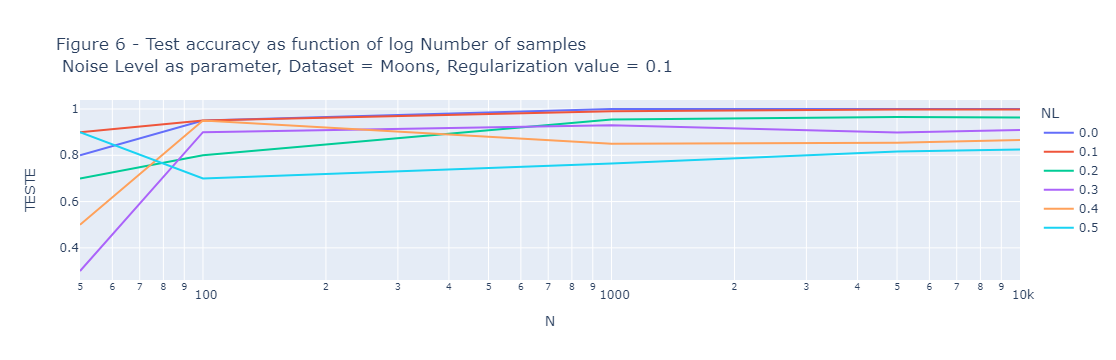

In [61]:
px.line(results.reset_index(), x='N',y='TESTE', color='NL',log_x=True,
           title="Figure 6 - Test accuracy as function of log Number of samples<br> Noise Level as parameter, Dataset = Moons, Regularization value = 0.1")

## 6-Are the noise level effect the number of datapoints needed to reach optimal test results?

A deef looking in the range of n= 1000, 5000 , 10000 shows that when it is more moisy, the train needs more sample to rrach optimal reslults